<a href="https://colab.research.google.com/github/tzoung-yu/TrueVolume/blob/main/TrueVolume%E4%B8%8A%E5%B8%82%E4%B8%8A%E6%AB%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start to update codes
Done!
統計起始日:2022/09
1471 首利 上市 電子零組件業
多空成交量能線
score:31


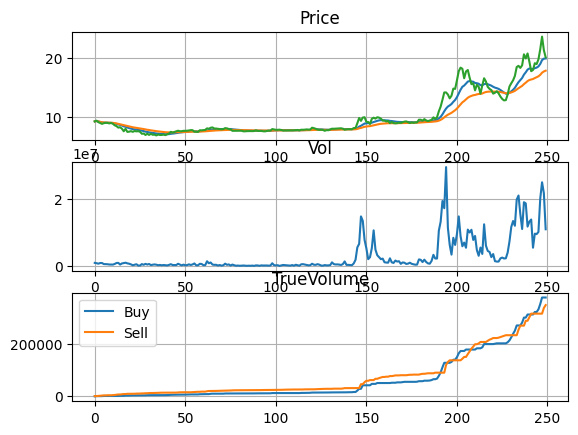

In [2]:
!pip install twstock
#!twstock -U
import twstock
from twstock import Stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

#股票代號
stoid="首利"

def TrueVol(pd):
  df=pd
  opp=df['Open']
  clo=df['Close']
  voo=df['Volume']
  hig=df['High']
  llo=df['Low']
  upl=[]
  dol=[]
  bll=[]
  upc=0.0
  dlc=0.0
  blc=0.0
  lp=0.0
  for i in range(len(opp)):
    if(lp==0.0):
      lp=opp[i]
    if(opp[i]<clo[i]):
      if(clo[i] >= opp[i] + ((hig[i] - opp[i])/3) and clo[i]>=lp):
        upc+=(voo[i]/1000)
      else:
        if(clo[i] < opp[i] + ((hig[i] - opp[i])/4)):
          dlc+=(voo[i]/1000)
    else:
      if(clo[i] <= opp[i]-((opp[i]-llo[i])/4) and clo[i]<=lp):
        dlc+=(voo[i]/1000)
    upl.append(upc)
    dol.append(dlc)
    blc+=voo[i]/1000
    bll.append(blc/2)
    lp=clo[i]
  ema10=clo.ewm(span=13).mean()
  ema30=clo.ewm(span=35).mean()

  e10=ema10.iloc[-1]
  e30=ema30.iloc[-1]
  score=(e10-e30)+((upc-dlc)/1000)
  print("score:"+ str(int(score)))

  plt.subplot(311)
  plt.title('Price')
  plt.plot(ema10)
  plt.plot(ema30)
  plt.plot(clo)
  plt.grid()

  plt.subplot(312)
  plt.title('Vol')
  plt.plot(voo)
  plt.grid()

  plt.subplot(313)
  plt.plot(upl, label='Buy')
  plt.plot(dol, label='Sell')
  plt.title('TrueVolume')
  plt.grid()
  plt.legend()

  plt.show()

thisday = datetime.today()
day_start = thisday - timedelta(days=365)

print("統計起始日:"+day_start.strftime("%Y/%m"))

codes = twstock.codes
df = pd.DataFrame.from_dict(codes, orient='index')

stoname=str(stoid)
if not stoname.isdigit():
  nn = df[df["name"] == stoname]
  stoid=str(int(nn.code.iloc[0]))

nn=df[df["code"]==stoid]
print(stoid, nn.name[0], nn.market[0],nn.group[0])

print('多空成交量能線')

# 讀取股價資料
stock = Stock(stoid)                              # 擷取股價
sto_price = stock.fetch_from(day_start.year, day_start.month)

sto_attr = ['Date', 'Volume', 'Turnover', 'Open', 'High', 'Low', 'Close', 'Change', 'Transaction']
data1 = pd.DataFrame(columns = sto_attr, data = sto_price)
data1 = data1.drop(['Turnover', 'Change', 'Transaction'], axis=1)

TrueVol(data1)